In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from pathlib import Path
import pendulum

pd.set_option('max_columns', 2000)
pd.set_option('max_row', 200)

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["font.family"] = "FreeSans"

In [ ]:
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

In [4]:
influ = pd.read_csv("data/top200_2016_influencers_screenname_per_cat_verified.csv")
influ = influ.head(25)
influ.to_csv("data/influ_2016_top25.csv", index=None)

# users = set()

# for i, row in influ.iterrows():
#     users = users | set(row)
    
# print(len(users))

# with open("data/all_influ_username-2016.txt", "w") as f:
#     for u in users:
#         if u[-1] == "✓":
#             f.write(u[1:-1] + "\n")
#         elif u.endswith("???"):
#             continue
#         else:
#             f.write(u[1:] + "\n")

In [15]:
df = pd.DataFrame()

for in_name in Path("data/top_100_influencer_2020/").rglob("*.csv"):
    df_influ = pd.read_csv(in_name, usecols=["username"])
    df_influ = df_influ.head(25)
    # print(df_influ)
    print(in_name.name[8: -9])
    df[in_name.name[8: -9]] = df_influ["username"]

df = df.rename(columns={"fake": "Fake", "extreme_bias_left": "EB left", "extreme_bias_right": "EB right",
                        "lean_left": "Leaning left", "lean_right": "Leaning right",
                        "left": "Left", "right": "Right", "center": "Center"})
df = df[["Fake", "EB right", "Right", "Leaning right", "Center", "Leaning left", "Left", "EB left"]]
df.to_csv("data/influ_2020_top25_New.csv", index=None)
df

extreme_bias_left
lean_right
extreme_bias_right
lean_left
fake
right
center
left


,Fake,EB right,Right,Leaning right,Center,Leaning left,Left,EB left
0,seanhannity,DonaldJTrumpJr,DonaldJTrumpJr,nypost,thehill,CNN,MSNBC,DearAuntCrabby
1,gatewaypundit,BreitbartNews,marklevinshow,WSJ,AP,nytimes,thedailybeast,funder
2,DavidJHarrisJr,dbongino,jsolomonReports,DonaldJTrumpJr,Reuters,kylegriffin1,kylegriffin1,ImpeachmentHour
3,JudicialWatch,marklevinshow,RealJamesWoods,EricTrump,kylegriffin1,ABC,DavidCornDC,MeidasTouch
4,WayneDupreeShow,realDonaldTrump,FoxNews,realDonaldTrump,JonLemire,washingtonpost,HuffPost,TheDemCoalition
5,catturd2,newsmax,SaraCarterDC,WashTimes,Newsweek,CNNPolitics,NoahShachtman,grantstern
6,TomFitton,DailyMail,DailyCaller,marklevinshow,yarotrof,NPR,RawStory,OccupyDemocrats
7,OANN,RaheemKassam,MZHemingway,brithume,USATODAY,NBCNews,MotherJones,Stop_Trump20
8,dbongino,RealJamesWoods,TrumpWarRoom,RealJamesWoods,ProjectLincoln,CBSNews,TeaPainUSA,InSpiteOfTrump
9,Thomas1774Paine,joelpollak,dcexaminer,KimStrassel,JoeBiden,politico,svdate,froggneal


In [27]:
influs = pd.read_csv("data/influ_2016_top25.csv").head(5)
# influs = pd.read_csv("data/influ_2016_top25.csv").head(25)
from collections import defaultdict

dict_influs = defaultdict(set)
for index, col in influs.iteritems():
    if index == "EB left":
        continue
    if index in ["EB right", "EB left", "Fake"]:
        index = "Fake & extreme bias"
    for u in col:
        if u[-1] == "✓":
            u = u[1:-1]
        elif u.endswith("???"):
            continue
        else:
            u = u[1:]
        dict_influs[index].add(u)
    
# influs = pd.read_csv("data/influ_2020_top25.csv").head(5)
influs = pd.read_csv("data/influ_2020_top25_New.csv").head(5)
# influs = pd.read_csv("data/influ_2020_top25.csv").head(25)
# influs = pd.read_csv("data/influ_2020_top25_New.csv").head(25)

for index, col in influs.iteritems():
    if index == "EB left":
        continue
    if index in ["EB right", "EB left", "Fake"]:
        index = "Fake & extreme bias"
    for u in col:            
        dict_influs[index].add(u)
    
dict_influs # 真正有影响力的人！

defaultdict(set,
            {'Fake & extreme bias': {'BreitbartNews',
              'DRUDGE_REPORT',
              'DailyCaller',
              'DavidJHarrisJr',
              'DonaldJTrumpJr',
              'JudicialWatch',
              'PrisonPlanet',
              'RealAlexJones',
              'WayneDupreeShow',
              'dbongino',
              'gatewaypundit',
              'marklevinshow',
              'realDonaldTrump',
              'seanhannity',
              'wikileaks',
              'zerohedge'},
             'Right': {'DRUDGE_REPORT',
              'DonaldJTrumpJr',
              'FoxNews',
              'RealJamesWoods',
              'dcexaminer',
              'jsolomonReports',
              'marklevinshow',
              'nypost',
              'realDonaldTrump'},
             'Leaning right': {'DonaldJTrumpJr',
              'EricTrump',
              'RT_America',
              'RT_com',
              'WSJ',
              'WashTimes',
              'nypos

In [9]:
dict_influs = {}

for line in open("data/selected_influencers.txt"):
    w = line.strip().split(",")
    category = w[0]
    dict_influs[category] = w[1:]

dict_influs  

{'Fake': ['seanhannity',
  'PrisonPlanet',
  'gatewaypundit',
  'RealAlexJones',
  'DavidJHarrisJr'],
 'EB right': ['DonaldJTrumpJr',
  'realDonaldTrump',
  'BreitbartNews',
  'DailyCaller',
  'dbongino'],
 'Right': ['DonaldJTrumpJr',
  'FoxNews',
  'marklevinshow',
  'realDonaldTrump',
  'jsolomonReports'],
 'Leaning right': ['nypost',
  'WSJ',
  'DonaldJTrumpJr',
  'WashTimes',
  'EricTrump'],
 'Center': ['thehill', 'CNN', 'AP', 'Reuters', 'politico'],
 'Leaning left': ['CNN', 'nytimes', 'kylegriffin1', 'washingtonpost', 'ABC'],
 'Left': ['MSNBC', 'HuffPost', 'thedailybeast', 'TIME', 'kylegriffin1'],
 'EB left': ['DearAuntCrabby',
  'Bipartisanism',
  'funder',
  'PalmerReport',
  'ImpeachmentHour']}

Fake
8268452.0 5
EB right
99074733.0 5
Right
116728332.0 5
Leaning right
29632919.0 5
Center
thehill 4002312.0
CNN 51284902.0
AP 14852827.0
Reuters 22566220.0
politico 4410293.0
97116554.0 5
Leaning left
CNN 51284902.0
nytimes 48338424.0
kylegriffin1 1000346.0
washingtonpost 16284049.0
ABC 16219891.0
133127612.0 5
Left
34923045.0 5
EB left
1555054.0 5


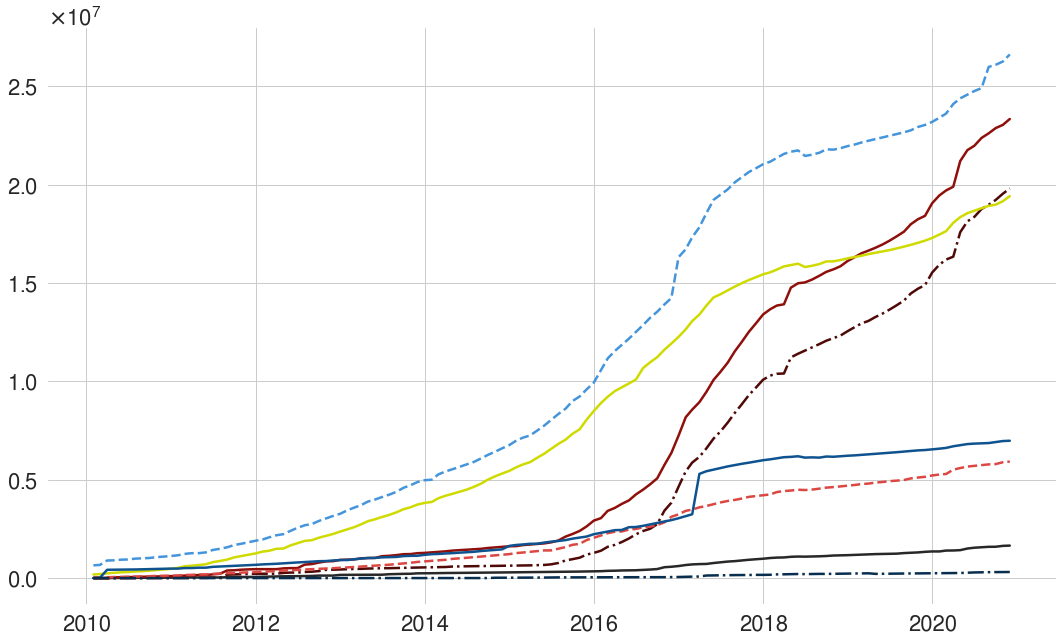

In [32]:
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=2)
plt.rcParams["font.family"] = "FreeSans"

colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
shapes = ["-", "-.", "-", "--", "-", "--", "-", "-."]
# shapes = ["-", "-.", "--", "-", "--", "-."]

# influs = pd.read_csv("data/influ_2016_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))

fig = plt.figure(figsize=(14, 8))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left,bottom,width,height])

# figure = plt.figure(figsize=(12, 8))
# ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in dict_influs.items():
    print(index)
    if index == "EB left":
        index = "Extreme bias left"
    elif index == "EB right":
        index = "Extreme bias right"
    if index == "Leaning left":
        index = "Left leaning"
    elif index == "Leaning right":
        index = "Right leaning"
        
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        if index == "Center" or index == "Left leaning":
            print(u, ts[-1])
        all_ts += ts
        
#     print(all_ts)
#     all_ts = all_ts / all_ts["2020-10-31"]

#     df["FollowerCount"].plot(**font)
#     all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)

    plot_index += 1
    print(all_ts[-1], user_counts)
    ax.plot(all_ts.index, all_ts / user_counts, shapes[(plot_index - 2)], c=colors[plot_index-2], lw=2.5, label=index)

#     print(all_ts / user_counts)
#     plt.xlabel("")
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.ticklabel_format(style='sci', scilimits=(-1, 1), axis='y', useMathText=True)

# plt.legend(loc=2, bbox_to_anchor=(-0.15, -0.1), ncol=4, frameon=False)
# plt.legend(loc=2, bbox_to_anchor=(-0.1, -0.05), ncol=3, frameon=False)
# plt.ylabel("Average follower counts")
# plt.savefig(f"fig/follow_top25.pdf", dpi=300, bbox_inches="tight")
# plt.savefig(f"fig/follow_selected_top5.pdf", dpi=300, bbox_inches="tight")

Fake
8268452.0 5
EB right
99074733.0 5
Right
116728332.0 5
Leaning right
29632919.0 5
Center
thehill 4002312.0
CNN 51284902.0
AP 14852827.0
Reuters 22566220.0
politico 4410293.0
97116554.0 5
Leaning left
CNN 51284902.0
nytimes 48338424.0
kylegriffin1 1000346.0
washingtonpost 16284049.0
ABC 16219891.0
133127612.0 5
Left
34923045.0 5
EB left
1555054.0 5


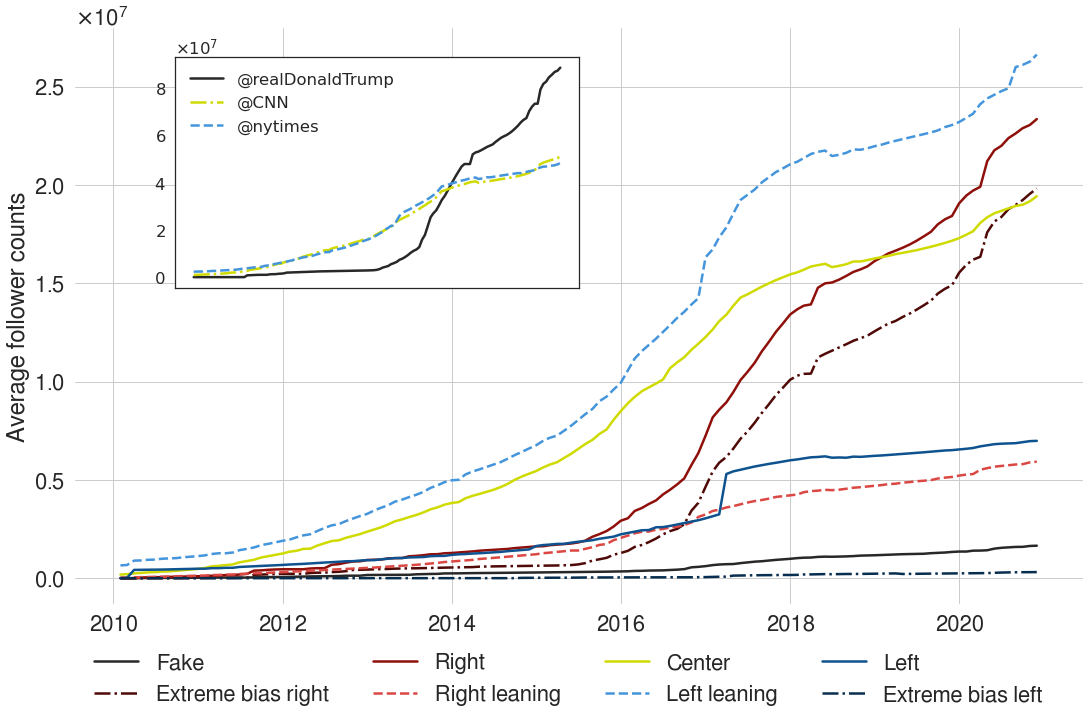

In [63]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=2)
plt.rcParams["font.family"] = "FreeSans"

colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
shapes = ["-", "-.", "-", "--", "-", "--", "-", "-."]
# shapes = ["-", "-.", "--", "-", "--", "-."]

# influs = pd.read_csv("data/influ_2016_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))

fig = plt.figure(figsize=(14, 8))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left,bottom,width,height])

# figure = plt.figure(figsize=(12, 8))
# ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in dict_influs.items():
    print(index)
    if index == "EB left":
        index = "Extreme bias left"
    elif index == "EB right":
        index = "Extreme bias right"
    if index == "Leaning left":
        index = "Left leaning"
    elif index == "Leaning right":
        index = "Right leaning"
        
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        if index == "Center" or index == "Left leaning":
            print(u, ts[-1])
        all_ts += ts
        
#     print(all_ts)
#     all_ts = all_ts / all_ts["2020-10-31"]

#     df["FollowerCount"].plot(**font)
#     all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)

    plot_index += 1
    print(all_ts[-1], user_counts)
    ax.plot(all_ts.index, all_ts / user_counts, shapes[(plot_index - 2)], c=colors[plot_index-2], lw=2.5, label=index)

#     print(all_ts / user_counts)
#     plt.xlabel("")
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.ticklabel_format(style='sci', scilimits=(-1, 1), axis='y', useMathText=True)
# plt.legend(loc=2, bbox_to_anchor=(0, -0.1), ncol=4, frameon=False)
plt.legend(loc=2, bbox_to_anchor=(0, -0.05), ncol=4, frameon=False)
plt.ylabel("Average follower counts")
# plt.savefig(f"fig/follow_top25.pdf", dpi=300, bbox_inches="tight")
# plt.show()

sns.set(style="white", font_scale=1.5)

colors = ["#282828", "#CFDB00", "#4495DB"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
shapes = ["-", "-.", "--", "--", "-", "--", "-", "-."]
# shapes = ["-", "-.", "--", "-", "--", "-."]

# influs = pd.read_csv("data/influ_2016_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
plot_index = 1

influs = ["realDonaldTrump", "CNN", "nytimes"]

left, bottom, width, height = 0.1,0.55,0.4,0.4
ax2 = fig.add_axes([left,bottom,width,height])
    
for u in influs:
    influ_name = u
    # print(influ_name)

    ts = pd.Series(None, pdate, dtype=float)

    in_name = Path("data/csv_data-2/" + influ_name + ".csv")

    try:
        df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
    except:
        print("LOSE:", index, in_name)
        continue
    # print(df)

    user_counts += 1
    df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

    for _i, _row in df.iterrows():
        dt_i = pendulum.instance(_i)
        dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
        # dt_i = dt_i.format("YYYY-MM-DD")
        ts[dt_i] = int(_row["FollowerCount"])

    # print(ts)
    ts.fillna(method="ffill", inplace=True)
    ts.fillna(0, inplace=True)

    plot_index += 1

    ax2.plot(ts.index, ts, shapes[(plot_index - 2)], c=colors[plot_index-2], lw=2.5, label="@" + u)

#     print(all_ts / user_counts)
#     plt.xlabel("")
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
# for key, spine in ax2.spines.items():
#     spine.set_visible(False)
ax2.ticklabel_format(style='sci', scilimits=(-1, 1), axis='y', useMathText=True)
ax2.set_xticks([])
ax2.legend()
# ax2.legend(loc=3, bbox_to_anchor=(-0.1, 0), ncol=3, frameon=False)

# plt.legend(loc=2, bbox_to_anchor=(0, -0.1), ncol=4, frameon=False)
plt.legend(frameon=False)
plt.ylabel("")
# plt.savefig(f"fig/follow_top25.pdf", dpi=300, bbox_inches="tight")
# plt.show()
plt.savefig(f"fig/follow_selected_top5.pdf", dpi=300, bbox_inches="tight")

Fake
EB right
Right
Leaning right
Center
Leaning Left
Left


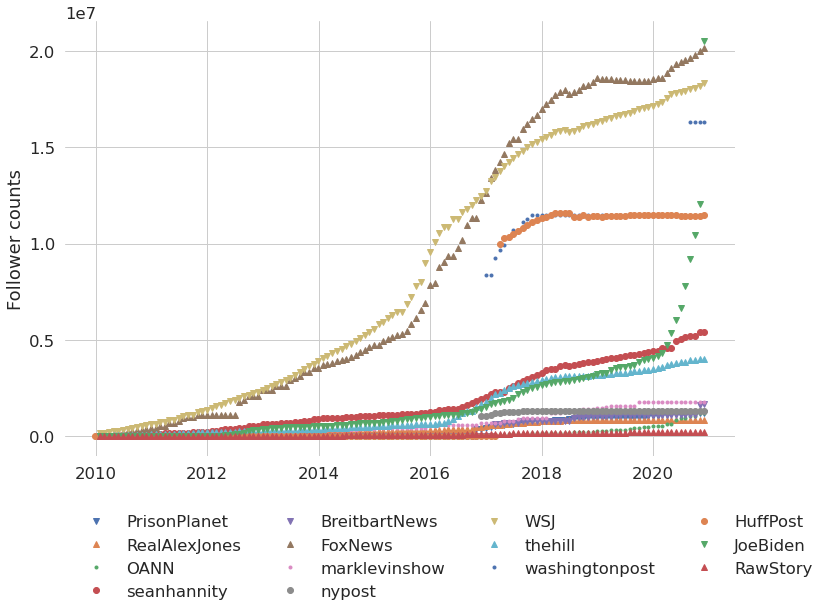

In [102]:
# 针对个人
dict_influs = {
    "Fake": ["PrisonPlanet", "RealAlexJones", "OANN", "seanhannity"],
    "EB right": ["realDonaldTrump", "BreitbartNews"],
    "Right": ["FoxNews", "marklevinshow"],
    "Leaning right": ["nypost", "WSJ"],
    "Center": ["CNN", "thehill"],
    "Leaning Left": ["nytimes", "washingtonpost"],
    "Left": ["HuffPost", "JoeBiden", "RawStory"],
}

dict_influs = {
    "Fake": ["PrisonPlanet", "RealAlexJones", "OANN", "seanhannity"],
    "EB right": ["BreitbartNews"],
    "Right": ["FoxNews", "marklevinshow"],
    "Leaning right": ["nypost", "WSJ"],
    "Center": ["thehill"],
    "Leaning Left": ["washingtonpost"],
    "Left": ["HuffPost", "JoeBiden", "RawStory"],
}


plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

influs = pd.read_csv("data/influ_2016_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))
figure = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plot_index = 1
shapes = [".", "o", "v", "^"]

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in dict_influs.items():
    print(index)
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

            

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        plot_index +=1 
        
        if plot_index > 3:
            plot_index = 0
        ax.plot(ts.index, ts, shapes[plot_index], lw=2, label=u)

for key, spine in ax.spines.items():
    spine.set_visible(False)
        
plt.legend(loc=2, bbox_to_anchor=(0, -0.1), ncol=4, frameon=False)
plt.ylabel("Follower counts")
plt.savefig(f"fig/union_followers.png", dpi=300, bbox_inches="tight")

Fake
EB right
Right
Leaning right
Center
CNN 51284902.0
thehill 4002312.0
politico 4410293.0
CNNPolitics 3763251.0
Reuters 22566220.0
NateSilver538 3669176.0
AP 14852827.0
business 6816180.0
USATODAY 4174090.0
AP_Politics 402188.0
FiveThirtyEight 1352166.0
bpolitics 335363.0
jaketapper 1672786.0
DRUDGE_REPORT 3.0
cnnbrk 2843443.0
businessinsider 3155946.0
AC360 1609512.0
cnni 11438794.0
brianstelter 764108.0
KellyannePolls 3005481.0
wikileaks 20016.0
SopanDeb 180018.0
KFILE 372467.0
BBCWorld 30113242.0
NewDay 350366.0
Leaning left
LOSE: Leaning left data/csv_data-2/PolitiFact.csv
Left
EB left
Fake
EB Right
Right
Leaning right
Center
Leaning left
Left
EB left
LOSE: EB left data/csv_data-2/diamondlilron.csv
LOSE: EB left data/csv_data-2/HollyHuntley3.csv
LOSE: EB left data/csv_data-2/patrickinmass.csv
LOSE: EB left data/csv_data-2/nyx_with.csv
LOSE: EB left data/csv_data-2/404HDTV.csv
LOSE: EB left data/csv_data-2/JaxsZ.csv


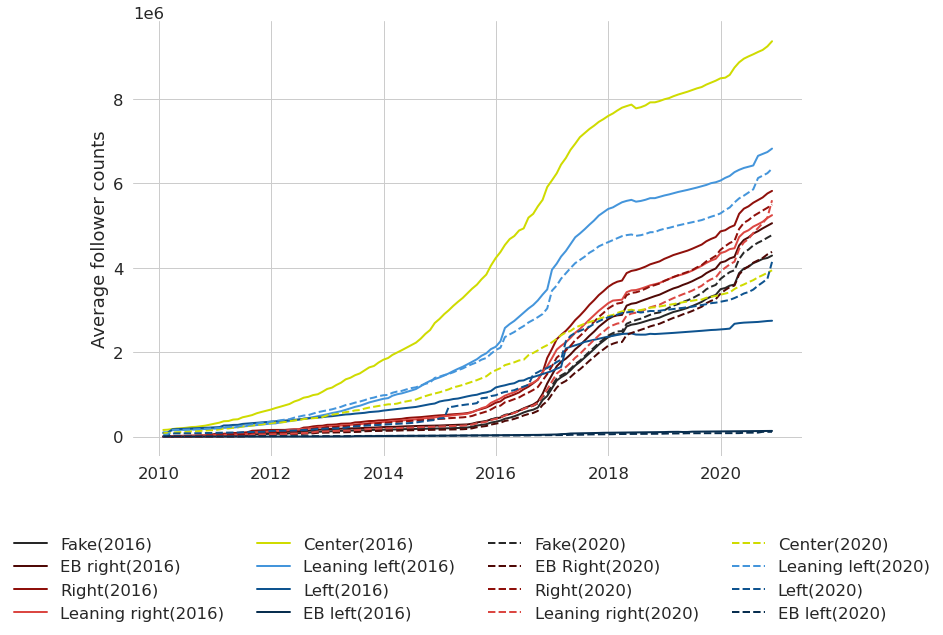

In [61]:
plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

influs = pd.read_csv("data/influ_2016_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))
figure = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
        if u[-1] == "✓":
            u = u[1:-1]
        elif u.endswith("???"):
            continue
        else:
            u = u[1:]

        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

            

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        if index == "Center":
            print(u, ts[-1])
        all_ts += ts
        
    # print(all_ts)
#     all_ts = all_ts / all_ts["2020-10-31"]


    # df["FollowerCount"].plot(**font)
    # all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)

    plot_index += 1
#     ax.set_xlabel("Influencers in 2020")
#     ax.set_ylim((0, 5.5))
    ax.plot(all_ts.index, all_ts / user_counts, c=colors[plot_index-2], lw=2, label=index + "(2016)")
#     print(all_ts / user_counts)

#     plt.xlabel("")
    
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)
        
# plt.legend()
# plt.ylabel("Average follower counts")
# plt.savefig(f"fig/2020_followers.png", dpi=300, bbox_inches="tight")

influs = pd.read_csv("data/influ_2020_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))
# figure = plt.figure(figsize=(12, 8))
# ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
#         if u[-1] == "✓":
#             u = u[1:-1]
#         elif u.endswith("???"):
#             continue
#         else:
#             u = u[1:]

        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        all_ts += ts
        
    # print(all_ts)
#     all_ts = all_ts / all_ts["2020-10-31"]


    # df["FollowerCount"].plot(**font)
    # all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)

    plot_index += 1
#     ax.set_xlabel("Influencers in 2020")
#     ax.set_ylim((0, 5.5))
    ax.plot(all_ts.index, all_ts / user_counts, "--", c=colors[plot_index-2], lw=2, label=index + "(2020)")
#     print(all_ts / user_counts)

#     plt.xlabel("")
    
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)
        
plt.legend(loc=2, bbox_to_anchor=(-0.2, -0.15), ncol=4, frameon=False)
plt.ylabel("Average follower counts")
plt.savefig(f"fig/2020_followers.png", dpi=300, bbox_inches="tight")

Fake
EB right
Right
Leaning right
Center
Leaning left
LOSE: Leaning left data/csv_data-2/PolitiFact.csv
Left
EB left


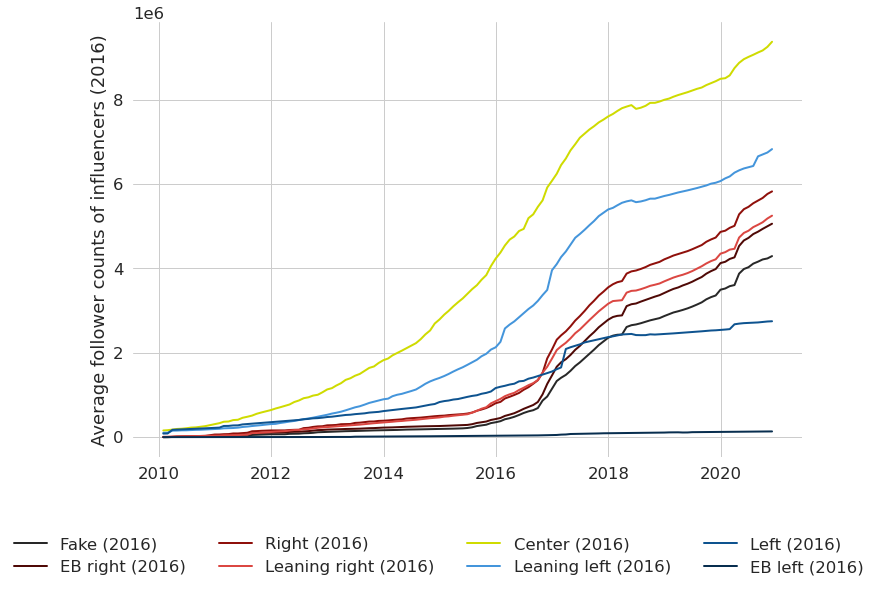

In [56]:
plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

influs = pd.read_csv("data/influ_2016_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))
figure = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
        if u[-1] == "✓":
            u = u[1:-1]
        elif u.endswith("???"):
            continue
        else:
            u = u[1:]

        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        all_ts += ts
        
    # print(all_ts)
#     all_ts = all_ts / all_ts["2020-10-31"]


    # df["FollowerCount"].plot(**font)
    # all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)

    plot_index += 1
#     ax.set_xlabel("Influencers in 2020")
#     ax.set_ylim((0, 5.5))
    ax.plot(all_ts.index, all_ts / user_counts, c=colors[plot_index-2], lw=2, label=index + " (2016)")
#     print(all_ts / user_counts)

#     plt.xlabel("")
    
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)
        
plt.legend(loc=2, bbox_to_anchor=(-0.2, -0.15), ncol=4, frameon=False)
plt.ylabel("Average follower counts of influencers (2016)")
plt.savefig(f"fig/2020_followers.png", dpi=300, bbox_inches="tight")

Fake
EB Right
Right
Leaning right
Center
Leaning left
Left
EB left
LOSE: EB left data/csv_data-2/diamondlilron.csv
LOSE: EB left data/csv_data-2/HollyHuntley3.csv
LOSE: EB left data/csv_data-2/patrickinmass.csv
LOSE: EB left data/csv_data-2/nyx_with.csv
LOSE: EB left data/csv_data-2/404HDTV.csv
LOSE: EB left data/csv_data-2/JaxsZ.csv


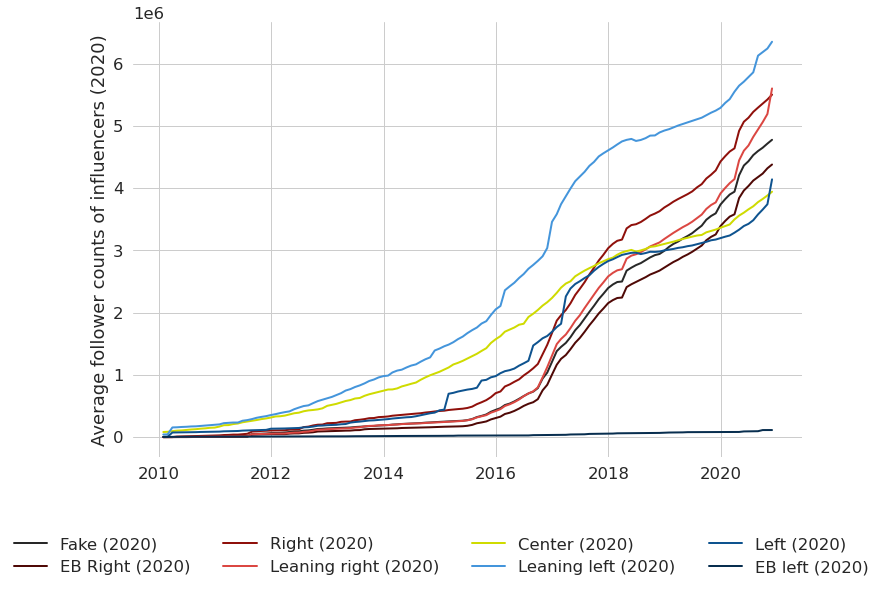

In [57]:
plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

influs = pd.read_csv("data/influ_2020_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))
figure = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    
    user_counts = 0
    for u in row:
#         if u[-1] == "✓":
#             u = u[1:-1]
#         elif u.endswith("???"):
#             continue
#         else:
#             u = u[1:]

        influ_name = u
        # print(influ_name)
        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", index, in_name)
            continue
        # print(df)
        
        user_counts += 1
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        all_ts += ts
        
    # print(all_ts)
#     all_ts = all_ts / all_ts["2020-10-31"]


    # df["FollowerCount"].plot(**font)
    # all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)

    plot_index += 1
#     ax.set_xlabel("Influencers in 2020")
#     ax.set_ylim((0, 5.5))
    ax.plot(all_ts.index, all_ts / user_counts, c=colors[plot_index-2], lw=2, label=index + " (2020)")

for key, spine in ax.spines.items():
    spine.set_visible(False)
        
plt.legend(loc=2, bbox_to_anchor=(-0.2, -0.15), ncol=4, frameon=False)
plt.ylabel("Average follower counts of influencers (2020)")
plt.savefig(f"fig/2020_followers.png", dpi=300, bbox_inches="tight")

In [18]:
influs = pd.read_csv("data/influ_2016_top25.csv").head(5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

users = set()
users_category = {}

for i, col in influs.iteritems():
    # print(i, col)
    for u in col:
        if u[-1] == "✓":
            u = u[1:-1]
        elif u.endswith("???"):
            continue
        else:
            u = u[1:]
        users.add(u)
        if i in ["Fake", "EB left", "EB right"]:
            c = colors[0]
        elif i.endswith("eft"):
            c = colors[6]
        elif i.endswith("ight"):
            c = colors[2]
        else:
            c = colors[4]
        
        users_category[u] = c

influs = pd.read_csv("data/influ_2020_top25.csv").head(5)

for i, col in influs.iteritems():
    # print(i, col)
    for u in col:
        users.add(u)
        
        if i in ["Fake", "EB left", "EB right"]:
            c = colors[0]
        elif i.endswith("eft"):
            c = colors[6]
        elif i.endswith("ight"):
            c = colors[2]
        else:
            c = colors[4]
            
        users_category[u] = c
    
    
print(len(users))

60


In [19]:
users_category

{'PrisonPlanet': '#282828',
 'RealAlexJones': '#282828',
 'zerohedge': '#282828',
 'DRUDGE_REPORT': '#8F100B',
 'realDonaldTrump': '#8F100B',
 'DailyCaller': '#8F100B',
 'BreitbartNews': '#282828',
 'wikileaks': '#282828',
 'FoxNews': '#8F100B',
 'dcexaminer': '#8F100B',
 'nypost': '#8F100B',
 'WSJ': '#8F100B',
 'WashTimes': '#8F100B',
 'RT_com': '#8F100B',
 'RT_America': '#8F100B',
 'CNN': '#CFDB00',
 'thehill': '#CFDB00',
 'politico': '#CFDB00',
 'CNNPolitics': '#0E538F',
 'Reuters': '#CFDB00',
 'nytimes': '#0E538F',
 'washingtonpost': '#0E538F',
 'ABC': '#0E538F',
 'NBCNews': '#0E538F',
 'Slate': '#0E538F',
 'HuffPost': '#0E538F',
 'TIME': '#0E538F',
 'thedailybeast': '#0E538F',
 'RawStory': '#0E538F',
 'HuffPostPol': '#0E538F',
 'Bipartisanism': '#282828',
 'PalmerReport': '#282828',
 'peterdaou': '#282828',
 'crooksandliars': '#282828',
 'BoldBlueWave': '#282828',
 'seanhannity': '#282828',
 'DavidJHarrisJr': '#282828',
 'OANN': '#282828',
 'dbongino': '#8F100B',
 'gatewaypundit':

In [23]:
pdate = pd.date_range(start='2009-12-31', end='2020-12-31', freq="1M", closed="left")
figure = plt.figure(figsize=(8, 5))

for influ_name in users:
    u = influ_name
#     if u != "HuffPost":
#         continue
    ts = pd.Series(None, pdate, dtype=float)
    in_name = Path("data/csv_data-2/" + influ_name + ".csv")

    try:
        df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
    except:
        print("LOSE:", in_name)
        continue

    df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

    for _i, _row in df.iterrows():
        dt_i = pendulum.instance(_i)
        dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
        # dt_i = dt_i.format("YYYY-MM-DD")
        ts[dt_i] = int(_row["FollowerCount"])

    ts.fillna(method="ffill", inplace=True)
    ts.fillna(0, inplace=True)

    # plot_index += 1
#     ax.set_title(f"@{u}")
#         ax.set_ylim((0, 5.5))
#     ax.plot(ts.index, ts, c="k", lw=2)
    plt.plot(ts.index, ts, lw=1, color=users_category[u])
#     plt.plot(ts.index, ts, c="k", lw=1)
    # ax.xaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。
#     ax.yaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。

ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)

plt.yscale('log')
# plt.legend()
plt.savefig(f"fig/top5-influ.png", dpi=150, bbox_inches="tight")
plt.close()

In [ ]:
plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

influs = pd.read_csv("data/influ_2016_top25.csv").head(5)
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))

plot_index = 1

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    for u in row:
        if u[-1] == "✓":
            u = u[1:-1]
        elif u.endswith("???"):
            continue
        else:
            u = u[1:]

        influ_name = u
        # print(influ_name)

        ts = pd.Series(None, pdate, dtype=float)
        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", in_name)
            continue

        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))
        
        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])
            
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)

        figure = plt.figure(figsize=(8, 5))
        ax = plt.subplot(111)
        plot_index += 1
        ax.set_title(f"@{u}")
#         ax.set_ylim((0, 5.5))
        ax.plot(ts.index, ts, c="k", lw=2, label=index)

        for key, spine in ax.spines.items():
            spine.set_visible(False)

#         plt.legend()
        # plt.ylabel("N of followers of influencers")
        plt.savefig(f"fig/influ_follow/2016-{index}-@{u}.png", dpi=300, bbox_inches="tight")
        plt.close()
        

influs = pd.read_csv("data/influ_2020_top25.csv").head(5)

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    for u in row:
#         if u[-1] == "✓":
#             u = u[1:-1]
#         elif u.endswith("???"):
#             continue
#         else:
#             u = u[1:]

        influ_name = u
        # print(influ_name)

        ts = pd.Series(None, pdate, dtype=float)
        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", in_name)
            continue

        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))
        
        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])
            
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)

        figure = plt.figure(figsize=(8, 5))
        ax = plt.subplot(111)
        plot_index += 1
        ax.set_title(f"@{u}")
#         ax.set_ylim((0, 5.5))
        ax.plot(ts.index, ts, c="k", lw=2, label=index)

        for key, spine in ax.spines.items():
            spine.set_visible(False)

#         plt.yscale('log')
#         plt.legend()
        # plt.ylabel("N of followers of influencers")
        plt.savefig(f"fig/influ_follow/2020-{index}-@{u}.png", dpi=300, bbox_inches="tight")
        plt.close()

In [62]:
from pathlib import Path

df_users = {}

for _path in Path("data/joined_output").rglob("*.csv"):
    users = []
    if _path.name.endswith("network.csv"):
        continue
    print(_path.name)
    df = pd.read_csv(_path).head(25)

    for i, row in df.iterrows():
        # print(row["username"])
        # print(type(row["username"]))
        users.append(row["username"])

    df_users[_path.stem] = users

influ = pd.DataFrame(df_users).head(25)
influ.to_csv("data/influ_2020_top25.csv", index=None)

# with open("data/all_influ_username-2020.txt", "w") as f:
#     for u in users:
#         if u[-1] == "✓":
#             f.write(u[1:-1] + "\n")
#         elif u.endswith("???"):
#             continue
#         else:
#             f.write(u + "\n")

right.csv
lean_left.csv
center.csv
left.csv
extreme_bias_right.csv
lean_right.csv
fake.csv
extreme_bias_left.csv


Fake
EB Right
Right
Leaning right
Center
Leaning left
Left
EB left
LOSE: data/csv_data-2/diamondlilron.csv
LOSE: data/csv_data-2/HollyHuntley3.csv
LOSE: data/csv_data-2/patrickinmass.csv
LOSE: data/csv_data-2/nyx_with.csv
LOSE: data/csv_data-2/404HDTV.csv
LOSE: data/csv_data-2/JaxsZ.csv


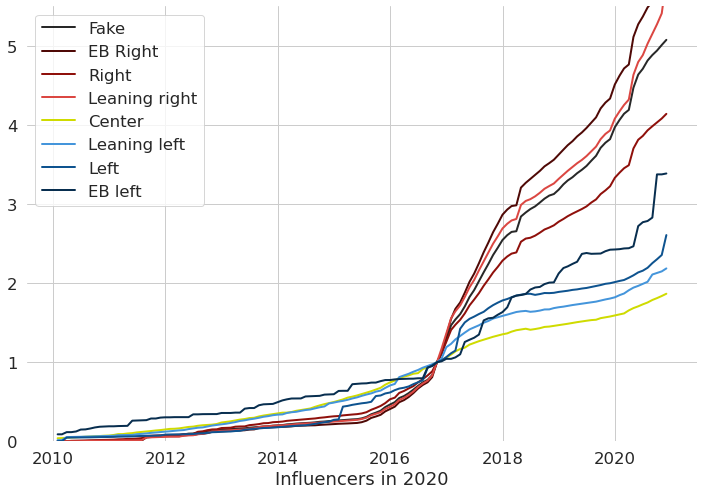

In [79]:
plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

influs = pd.read_csv("data/influ_2020_top25.csv")
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
# figure = plt.figure(figsize=(30, 12))
figure = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plot_index = 1

# ax1 = plt.subplot(221)
# ax1.plot(t,s, color="r",linestyle = "--")
# ax2 = plt.subplot(222)
# ax2.plot(t,s,color="y",linestyle = "-")
# ax3 = plt.subplot(223)
# ax3.plot(t,s,color="g",linestyle = "-.")
# ax4 = plt.subplot(224)
# ax4.plot(t,s,color="b",linestyle = ":")

for index, row in influs.iteritems():
    print(index)
    all_ts = pd.Series(0, pdate)
    for u in row:
#         if u[-1] == "✓":
#             u = u[1:-1]
#         elif u.endswith("???"):
#             continue
#         else:
#             u = u[1:]

        influ_name = u
        # print(influ_name)

        
        ts = pd.Series(None, pdate, dtype=float)

        in_name = Path("data/csv_data-2/" + influ_name + ".csv")

        try:
            df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
        except:
            print("LOSE:", in_name)
            continue
        # print(df)
        df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

        for _i, _row in df.iterrows():
            dt_i = pendulum.instance(_i)
            dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
            # dt_i = dt_i.format("YYYY-MM-DD")
            ts[dt_i] = int(_row["FollowerCount"])

        # print(ts)
        ts.fillna(method="ffill", inplace=True)
        ts.fillna(0, inplace=True)
        all_ts += ts
        
    # print(all_ts)
    all_ts = all_ts / all_ts["2016-10-31"]


    # df["FollowerCount"].plot(**font)
    # all_ts.plot(c="k")
#     ax = plt.subplot(240 + plot_index)
    plot_index += 1
    ax.set_xlabel("Influencers in 2020")
    ax.set_ylim((0, 5.5))
    ax.plot(all_ts.index, all_ts, c=colors[plot_index-2], lw=2, label=index)


#     plt.xlabel("")
    
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

#     ax = plt.gca()
    for key, spine in ax.spines.items():
        spine.set_visible(False)
plt.legend()
# plt.ylabel("N of followers of influencers")
plt.savefig(f"fig/2020_followers.png", dpi=300, bbox_inches="tight")

In [ ]:
Top 10 2016 Influencers
1 CNN 1304614008250
2 nytimes 835977987702
3 thehill 815721508840
4 politico 584601367840
5 washingtonpost 472355025555
6 CNNPolitics 411623737397
7 ABC 370885277696
8 FoxNews 357136478470
9 NBCNews 288394205328
10 realDonaldTrump 281773726488

Top 10 2020 Influencers
1 thehill 837458219815
2 washingtonpost 459469483830
3 nypost 320054651631
4 CNNPolitics 215521324904
5 CBSNews 204563669079
6 realDonaldTrump 175309404016
7 marklevinshow 170426134047
8 ProjectLincoln 161312738565
9 seanhannity 156562270980
10 dbongino 140294530957

If you could visualize the follower counts of these that would be great! Also plus JoeBiden and probably Hillary

In [ ]:
# Influ_2016 = ["CNN", "nytimes", "thehill", "politico", "washingtonpost", "CNNPolitics", "ABC", "FoxNews", "realDonaldTrump"]
# Influ_2020 = ["thehill", "washingtonpost", "nypost", "CNNPolitics", "CBSNews", "realDonaldTrump", "marklevinshow", "ProjectLincoln", "seanhannity", "dbongino"]
import matplotlib.dates as mdates

Influ_2016 = [
    "realDonaldTrump",
    "NEWS_MAKER",
    "PrisonPlanet",
    "HuffPost",
    "WSJ",
    "Bipartisanism",
    "FoxNews",
    "nytimes",
    "CNN",
    "mitchellvii"
]

Influ_2020 = [
    "marklevinshow",
    "realDonaldTrump",
    "seanhannity",
    "jilevin",
    "washingtonpost",
    "nypost",
    "RawStory",
    "thehill",
    "DonaldJTrumpJr",
    "dbongino",
]

Influs = []

for influ in Influ_2016:
    Influs.append(influ)

for influ in Influ_2020:
    Influs.append(influ)

Influs.append("JoeBiden")
Influs.append("HillaryClinton")

for influ_name in Influs:
    # print(in_name)
    in_name = Path("data/csv_data/" + influ_name + ".csv")

    df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
    df["dt"] = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))
    df.index = df["dt"]
    # print(df)

    figure = plt.figure(figsize=(10, 5))
    # df["FollowerCount"].plot(**font)
    plt.plot(df.index, df["FollowerCount"], c="k")
    plt.title("@" + influ_name)
    plt.ylabel("Number of followers")
    plt.xlabel("")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.savefig(f"fig/influ_follow/{influ_name}.png", bbox_tight=True)
    # plt.close()

In [61]:
import matplotlib.dates as mdates
import pendulum

Influs = []
  
Influ_2016 = [
    "realDonaldTrump",
    "NEWS_MAKER",
    "PrisonPlanet",
    "HuffPost",
    "WSJ",
    "Bipartisanism",
    "FoxNews",
    "nytimes",
    "CNN",
    "mitchellvii"
]

Influ_2020 = [
    "marklevinshow",
    # "realDonaldTrump",
    "seanhannity",
    "jilevin",
    "washingtonpost",
    "nypost",
    "RawStory",
    "thehill",
    "DonaldJTrumpJr",
    "dbongino",
]

pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
all_ts = pd.Series(0, pdate)

for influ in Influ_2016:
    Influs.append(influ)

for influ in Influ_2020:
    Influs.append(influ)

# Influs.append("JoeBiden")
# Influs.append("HillaryClinton")

for influ_name in Influs:
    print(in_name)
    pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
    ts = pd.Series(None, pdate)

    in_name = Path("data/csv_data/" + influ_name + ".csv")

    df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
    # print(df.head(1))
    df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

    # print(ts)

    for i, row in df.iterrows():
        dt_i = pendulum.instance(i)
        dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
        # dt_i = dt_i.format("YYYY-MM-DD")
        ts[dt_i] = int(row["FollowerCount"])
    
    ts.fillna(method="ffill", inplace=True)
    ts.fillna(0, inplace=True)

    all_ts += ts

data/csv_data/dbongino.csv
data/csv_data/realDonaldTrump.csv
data/csv_data/NEWS_MAKER.csv
data/csv_data/PrisonPlanet.csv
data/csv_data/HuffPost.csv
data/csv_data/WSJ.csv
data/csv_data/Bipartisanism.csv
data/csv_data/FoxNews.csv
data/csv_data/nytimes.csv
data/csv_data/CNN.csv
data/csv_data/mitchellvii.csv
data/csv_data/marklevinshow.csv
data/csv_data/seanhannity.csv
data/csv_data/jilevin.csv
data/csv_data/washingtonpost.csv
data/csv_data/nypost.csv
data/csv_data/RawStory.csv
data/csv_data/thehill.csv
data/csv_data/DonaldJTrumpJr.csv


In [ ]:
import matplotlib.dates as mdates
import pendulum

Influs = []
  
Influ_2016 = [
    "realDonaldTrump",
    "NEWS_MAKER",
    "PrisonPlanet",
    "HuffPost",
    "WSJ",
    "Bipartisanism",
    "FoxNews",
    "nytimes",
    "CNN",
    "mitchellvii"
]

Influ_2020 = [
    "marklevinshow",
    # "realDonaldTrump",
    "seanhannity",
    "jilevin",
    "washingtonpost",
    "nypost",
    "RawStory",
    "thehill",
    "DonaldJTrumpJr",
    "dbongino",
]

pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
all_ts = pd.Series(0, pdate)

for influ in Influ_2016:
    Influs.append(influ)

for influ in Influ_2020:
    Influs.append(influ)

# Influs.append("JoeBiden")
# Influs.append("HillaryClinton")

for influ_name in Influs:
    print(in_name)
    pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M", closed="left")
    ts = pd.Series(None, pdate)

    in_name = Path("data/csv_data/" + influ_name + ".csv")

    df = pd.read_csv(in_name, usecols=["MementoDatetime", "FollowerCount"])
    # print(df.head(1))
    df.index = pd.to_datetime(df["MementoDatetime"].apply(lambda x: str(x)[:8]))

    # print(ts)

    for i, row in df.iterrows():
        dt_i = pendulum.instance(i)
        dt_i = dt_i.set(day=1).add(days=-1).replace(tzinfo=None)
        # dt_i = dt_i.format("YYYY-MM-DD")
        ts[dt_i] = int(row["FollowerCount"])
    
    ts.fillna(method="ffill", inplace=True)
    ts.fillna(0, inplace=True)

    all_ts += ts

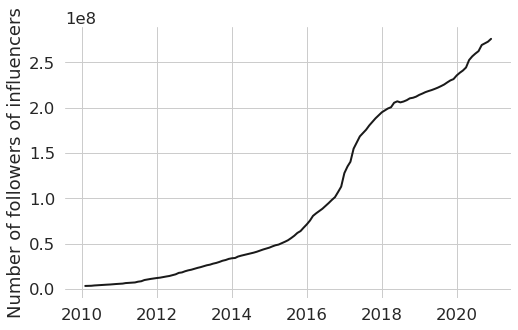

In [66]:
plt.rcParams["font.family"] = "FreeSans"
sns.set(style="whitegrid", font_scale=1.5)
figure = plt.figure(figsize=(8, 5))
# df["FollowerCount"].plot(**font)
# all_ts.plot(c="k")
plt.plot(all_ts.index, all_ts, c="k", lw=2)
plt.ylabel("Number of followers of influencers")
plt.xlabel("")
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

ax = plt.gca()
for key, spine in ax.spines.items():
    spine.set_visible(False)

plt.savefig(f"fig/follower_counts.png", dpi=300, bbox_tight=True)

In [8]:
pdate = pd.date_range(start='2010-01-01', end='2020-12-31', freq="1M")
pdate

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=132, freq='M')

In [4]:
for in_name in Path("data/csv_data").rglob("*.csv"):
    # print(in_name)
    break
    df = pd.read_csv(in_name)
    if len(df) == 0:
        continue
    df["dt"] = pd.to_datetime(df["MementoDatetime"])
    df.index = df["dt"]
    df["FollowerCount"].plot()
    plt.savefig(f"fig/influ_follow/{in_name.name}.png")
    plt.close()

In [95]:
df = pd.read_csv("data/influ_2016.csv")
for i, row in df.iterrows():
    for j, influ_name in row.items():
        # print(i, j, influ_name)
        try:
            influ_df = pd.read_csv("data/csv_data/" + influ_name + ".csv")
        except:
            print(influ_name)
            continue

        if len(influ_df) == 0:
            continue

        influ_df["dt"] = influ_df["MementoDatetime"].apply(lambda x: str(x)[:6])
        # print(influ_df)
        influ_df.index = influ_df["dt"]
        influ_df["FollowerCount"].plot()
        plt.xticks(rotation=45)
        plt.title("@" + influ_name)
        plt.xlabel("")
        plt.savefig(f"fig/influ_follow/{influ_name}.png", bbox_inches='tight')
        plt.close()

BoldBlueWave
PolitiFact
???????
???????
???????
???????


In [96]:
df = pd.read_csv("data/influ_2020.csv")
for i, row in df.iterrows():
    for j, influ_name in row.items():
        # print(i, j, influ_name)
        try:
            influ_df = pd.read_csv("data/csv_data/" + influ_name + ".csv")
        except:
            print(influ_name)
            continue

        if len(influ_df) == 0:
            continue

        influ_df["dt"] = influ_df["MementoDatetime"].apply(lambda x: str(x)[:6])
        # print(influ_df)
        influ_df.index = influ_df["dt"]
        influ_df["FollowerCount"].plot()
        plt.xticks(rotation=45)
        plt.title("@" + influ_name)
        plt.xlabel("")
        plt.savefig(f"fig/influ_follow/{influ_name}.png", bbox_inches='tight')
        plt.close()

realTuckFrumper
realTuckFrumper
realTuckFrumper
diamondlilron
HollyHuntley3
patrickinmass
nyx_with
Jerrygence
AndrewKerrNC
404HDTV
JaxsZ


In [2]:
influ_change = {}

df = pd.read_csv("data/influ_2016.csv")
for i, row in df.iterrows():
    for j, influ_name in row.items():
        # print(i, j, influ_name)
        try:
            influ_df = pd.read_csv("data/csv_data/" + influ_name + ".csv")
        except:
            print(influ_name)
            continue

        if len(influ_df) == 0:
            continue

        influ_df["dt"] = influ_df["MementoDatetime"].apply(lambda x: str(x)[:6])
        influ_df = influ_df[(influ_df.dt >= "201611") & (influ_df.dt <= "202012") & (influ_df.FollowerCount > 100)]
        # print(influ_df)
        
#         influ_change.append({
#             "name": influ_name,
#             "change": - influ_df.iloc[0]["FollowerCount"] + influ_df.iloc[-1]["FollowerCount"]
#         })
        influ_change[influ_name] = - influ_df.iloc[0]["FollowerCount"] + influ_df.iloc[-1]["FollowerCount"]
        
# influ_change = pd.DataFrame(influ_change)
# influ_change

df = pd.read_csv("data/influ_2020.csv")
for i, row in df.iterrows():
    for j, influ_name in row.items():
        # print(i, j, influ_name)
        try:
            influ_df = pd.read_csv("data/csv_data/" + influ_name + ".csv")
#             print(influ_name)
        except:
            print(influ_name)
            continue
            
        if len(influ_df) == 0:
            continue
            
        influ_df["dt"] = influ_df["MementoDatetime"].apply(lambda x: str(x)[:6])
        influ_df = influ_df[(influ_df.dt >= "201610") & (influ_df.dt <= "202012") & (influ_df.FollowerCount > 100)]
#         influ_df = influ_df[influ_df.FollowerCount > 100]
#         influ_change.append({
#             "name": influ_name,
#             "change": - influ_df.iloc[0]["FollowerCount"] + influ_df.iloc[-1]["FollowerCount"]
#         })
        try:
            influ_change[influ_name] = - influ_df.iloc[0]["FollowerCount"] + influ_df.iloc[-1]["FollowerCount"]
        except:
#             print(influ_df)
            continue
        
# print(influ_change)

# influ_change = pd.DataFrame({"name": influ_change.keys(), "change": influ_change.values()})
# influ_change

# 已经获取所有用户的变化

BoldBlueWave
PolitiFact
???????
???????
???????
???????
realTuckFrumper
realTuckFrumper
realTuckFrumper
diamondlilron
HollyHuntley3
patrickinmass
nyx_with
Jerrygence
AndrewKerrNC
404HDTV
JaxsZ


In [5]:
from collections import defaultdict

category_change = defaultdict(int)
category_count = defaultdict(int)

df = pd.read_csv("data/influ_2020.csv")
for i, row in df.iterrows():
    for j, influ_name in row.items():
        # print(i, j, influ_name)
        try:
            influ_df = pd.read_csv("data/csv_data/" + influ_name + ".csv")
        except:
            print(influ_name)
            continue

        if len(influ_df) == 0:
            continue

        if influ_name in influ_change:
            category_change[j] += influ_change[influ_name]
            category_count[j] += 1            
        
category_change

realTuckFrumper
realTuckFrumper
realTuckFrumper
diamondlilron
HollyHuntley3
patrickinmass
nyx_with
Jerrygence
AndrewKerrNC
404HDTV
JaxsZ


defaultdict(int,
            {'right': 99006034,
             'lean_left': 61053301,
             'center': 38887039,
             'left': 52536864,
             'extreme_bias_right': 88457212,
             'lean_right': 111762094,
             'fake': 92505294,
             'extreme_bias_left': 789176})

In [6]:
category_change = pd.DataFrame({"category": ["fake & extreme bias", "right", "lean right", "center", "lean left", "left"],
                                "increment": [(category_change["fake"] + category_change["extreme_bias_right"] + category_change["extreme_bias_left"]) / (category_count["fake"] + category_count["extreme_bias_right"] + category_count["extreme_bias_left"]),
                                                                          category_change["right"] / category_count["right"],
                                                                          category_change["lean_right"] / category_count["lean_right"],
                                                                          category_change["center"] / category_count["center"],
                                                                          category_change["lean_left"] / category_count["lean_left"],
                                                                          category_change["left"] / category_count["left"]]})

In [7]:
category_change

,category,increment
0,fake & extreme bias,5.048658e+06
1,right,6.187877e+06
2,lean right,7.450806e+06
3,center,2.777646e+06
4,lean left,3.591371e+06
5,left,3.283554e+06


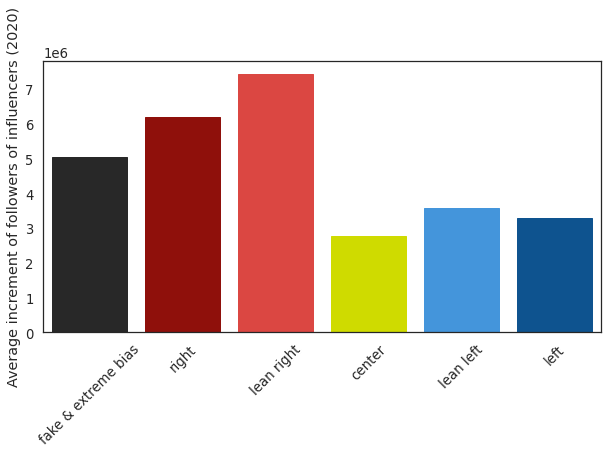

In [9]:
figure = plt.figure(figsize=(10, 5))
colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
i = 0

ax = sns.barplot(x=category_change.category, y=category_change["increment"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.xlabel("")
plt.ylabel("Average increment of followers of influencers (2020)")

plt.xticks(rotation=45)
plt.savefig("fig/Average_increment_of_followers_of_influencers(2020).png", dpi=300, bbox_inches="tight")

BoldBlueWave
PolitiFact
???????
???????
???????
???????


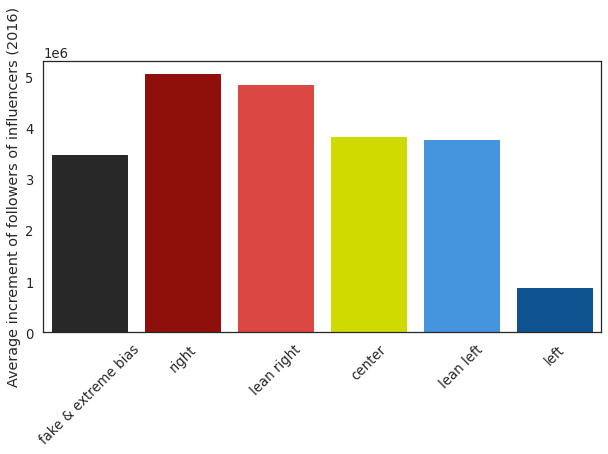

In [4]:
from collections import defaultdict

category_change = defaultdict(int)
category_count = defaultdict(int)

df = pd.read_csv("data/influ_2016.csv")
for i, row in df.iterrows():
    for j, influ_name in row.items():
        # print(i, j, influ_name)
        try:
            influ_df = pd.read_csv("data/csv_data/" + influ_name + ".csv")
        except:
            print(influ_name)
            continue

        if len(influ_df) == 0:
            continue

        if influ_name in influ_change:
            category_change[j] += influ_change[influ_name]
            category_count[j] += 1            
        
category_change = pd.DataFrame({"category": ["fake & extreme bias", "right", "lean right", "center", "lean left", "left"],
                                "increment": [(category_change["fake"] + category_change["extreme_bias_right"] + category_change["extreme_bias_left"]) / (category_count["fake"] + category_count["extreme_bias_right"] + category_count["extreme_bias_left"]),
                                                                          category_change["right"] / category_count["right"],
                                                                          category_change["lean_right"] / category_count["lean_right"],
                                                                          category_change["center"] / category_count["center"],
                                                                          category_change["lean_left"] / category_count["lean_left"],
                                                                          category_change["left"] / category_count["left"]]})

figure = plt.figure(figsize=(10, 5))
colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
i = 0

ax = sns.barplot(x=category_change.category, y=category_change["increment"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.xlabel("")
plt.ylabel("Average increment of followers of influencers (2016)")

plt.xticks(rotation=45)
plt.savefig("fig/Average_increment_of_followers_of_influencers(2016).png", dpi=300, bbox_inches="tight")